# ⾦融计算机语⾔讲义

⾼强 (mutecamel@gmail.com) ⾸都经济贸易⼤学⾦融学院

© 2020-06-01

# 第 13 课 语句 (statements) 和⽂件 (file) 操作

### 学习任务

本周是第 15 周。请⼀边阅读以下讲义，⼀边输⼊代码练习。本讲义特意将 Python 输出全部隐去，就
是希望同学们亲⼿输⼊代码，亲眼观看程序输出，这样才能收获经验。本讲义中的练习题将构成期末闭
卷考试 (占期末总评 60%) 的题库，所以请务必认真对待学习任务，不能按时完成任务者后果⾃负。
这⼀周我们学习 Python 的各种语句，以及 Python ⽂件操作的有关概念。

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'




- [文件对象](#18.⽂件对象)

- [路径操作](#19.路径操作)

- [⾃测题](#21.⾃测题)

## 1. 表达式语句 (expression statements)
1. 在交互 (interactive) 模式 REPL (read-evaluate-print-loop) 下，⼀个表达式 (expression) 经常作
为⼀个语句 (statement)，⽤于查看计算结果。例如：

In [2]:
str # 表达式：变量名
300*(1 + 0.05)**10 # 表达式：运算符
#locals() # 表达式：函数调⽤
'-'.join('abcd') # 表达式：⽅法调⽤
{c: ord(c) for c in set('hello')} # 表达式：花括号围场推导式

str

488.6683880332326

'a-b-c-d'

{'l': 108, 'h': 104, 'o': 111, 'e': 101}

但在脚本 (script) 模式下，⼀个仅进⾏` 计算 `(computation) 的表达式 (expression) 语句
(statement) 没有任何实际意义，因为计算出的新对象 (object) 没有被变量 (variable) 引⽤
(reference)，转眼就会被 垃圾回收 (garbage collected)，既不发⽣输⼊输出 (IO)，也不改变内存
状态。

2. 进⾏ `操作 `(operation) 的表达式 (expression) 语句 (statement) 在交互 (interactive) 模式和脚本
(script) 模式下都有实际意义，尤其是进⾏输⼊输出 (IO) 时。例如：

In [3]:
print('hello') # 表达式语句：⽆论在交互模式还是脚本模式下都会在屏幕终端输出
l = [] # 赋值语句
l.append('a') # 表达式语句：没有输⼊输出，但有操作，在交互模式和脚本模式下都有意义

hello


# 2. 赋值语句 (= )
给表达式 (expression) 计算出的对象 (object)`取名 `(name)，即`建⽴引⽤` (reference)，使对象 (object)
随后不被垃圾回收 (garbage collected)，也允许随后的语句 (statements) `进⼀步使⽤`或操作该对象
(object)，就需要`赋值` (assignment)。Python `赋值` (assignment) 语句 (statement) 使⽤⽅法多样，下
⾯分` 9` 种不同⽅式进⾏介绍。

#### 1. 单变量赋值。
这种赋值的⽅式是，在等号 = 左边写变量名称 (variable name)，右边写表达式
(expression)，使左边变量名 (variable name) 指向右边表达式 (expression) 计算出的对象
(object)。这种⽅式最简单也最常⽤。例如：

In [4]:
l = dir(str)
l.append('fake')
dir(str)
#l

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


这种赋值的效果，是在当前的 `局部访问范围 `(locals) 字典 (dict) 内更新 (update) ⼀个键值对 (key-value pair)，键 (key) 是变量名称 (variable name) 字符串 (str)，值 (value) 是变量 (variable) 所引
⽤ (reference) 的对象 (object)。例如：

#### locals是一个字典

In [5]:
#locals() # 局部访问范围字典
#'blah' in locals() # 局部访问范围内没有 'blah' 这个键
print('-------------------------')
#blah # 报错 NameError
print('-------------------------')
blah = list('practice makes perfect') # 赋值语句
blah # 查看 blah 的内容
'blah' in locals() # 局部访问范围内有了 'blah' 这个键
locals()['blah'] is blah # 同⼀个对象
print('-------------------------')
locals().update([('blah', 123)]) # 以软编码的⽅式赋值
blah # 查看 blah 的内容，已变为 123



-------------------------
-------------------------


['p',
 'r',
 'a',
 'c',
 't',
 'i',
 'c',
 'e',
 ' ',
 'm',
 'a',
 'k',
 'e',
 's',
 ' ',
 'p',
 'e',
 'r',
 'f',
 'e',
 'c',
 't']

True

True

-------------------------


123

In [6]:
# dictionary update sequence element #0 has length 4; 2 is required

#### 2. 多变量赋相同值。
这种赋值 (assignment) ⽅式就是连写多个等号 = ，把最右边的等号 = 右边的
表达式 (expression) 计算结果赋给多个等号 = 左边的变量名 (variable name)。这种⽅式并不很
常⽤，因为⼀个对象 (object) 通常只要有⼀个引⽤ (reference) 就够了。这种赋值 (assignment) ⽅
式⼀般常⽤于不可变 (immutable) 对象。例如：

'=','==','is'都可以连用

In [7]:
x = y = z = {'a': 1, 'b': 2, 'c': 3} # 语法允许，但没必要
x is y is z # is 也可以连⽤
x = y = z = 0 # 同时初始化三个变量
x == y == z # == 也可以连⽤

True

True

#### 3. 多变量赋不同值
这种赋值⽅式，在等号 = 左边⽤逗号 (comma) 分隔多个变量名 (variable
names)，右边写⼀个`可迭代` (iterable) 对象，把迭代 (iterate) 取出的值逐个赋给等号 = 左边的变
量 (variables)，变量的个数与迭代出的对象的个数必须相等。例如：

#### 可迭代对象包括列表、元组、集合（顺序不保证）、字典（只取keys或者只取value）和生成器（会消耗生成器内对象）

In [8]:
i = {ord(c): c for c in 'abc'} # 字典
i # 查看字典 i
x, y, z = i # 字典解包赋值，不保证顺序
x, y, z # 查看 x, y, z，迭代只取出 keys
x, y, z = i.values() # 视图解包赋值
x, y, z # 查看 x, y, z，迭代只取出 values
i = (c*5 for c in 'abc') # ⽣成器
x, y, z = i # ⽣成器解包赋值
list(i) # ⽣成器被消耗⼲净

{97: 'a', 98: 'b', 99: 'c'}

(97, 98, 99)

('a', 'b', 'c')

[]

#### 4. 等号左边 * 打包。
在等号 = 左边的某 ⼀个 变量 (variable) 前加` *` ，可以⽤来把等号` = `右边的
多个值打包成`列表`(list) 赋值给该变量 (variable)。等号` = `左边,` * `只能使⽤⼀次，否则会有歧义。
例如

没有`*`的变量只有一个值，有*的变量得到其他值且按顺序来

In [9]:
s = 'abcde'
x, y, *z = s
z
#*x, y, *z = s # 有歧义，语法错误
x, *y, z = s
y

['c', 'd', 'e']

['b', 'c', 'd']

#### 5. 等号右边 * 解包。
在等号 `=` 右边的变量前加` *` ，使⽤的是解包运算符的概念。例如：

左右两边可以同时有`*`，`==`右边的的`*`会让右边的可迭代对象迭代并解包，然后左边`*`按原规则打包

In [10]:
s = '123'
*x, y = 0, s
x # 查看 x 的内容
y # 查看 y 的内容
*x, y = 0, *s
x # 查看 x 的内容
y # 查看 y 的内容

[0]

'123'

[0, '1', '2']

'3'

#### 6. 给对象属性赋值。
对 Python 解释器 (interpreter) 内置 (built-in) 的少数基本 (basic) 类型 (class)
及其实例 (instance) 的属性 (attribute) 不能赋值，但对⼤多数 Python 定义的类型 (class) 及其实
例 (instance) 的属性 (attribute) 可以赋值。赋值的⽅法是在等号` = `左边写对象的属性 (attribute)
访问 (reference) 表达式 (expression)。例如：

In [11]:
s = 'abc'
#s.token = 'secret' # 字符串是基本内置类型，不能给字符串的属性赋值


In [12]:
import os
#os.token # os 模块没有 token 属性
os.token = 'secret' # 可以给 os 模块的属性赋值
os.token # 查看 os 模块的 token 属性


'secret'

In [13]:
class Dog: # 定义⼀个 Dog class
    pass # 占位语句，什么也不做，以便符合语法要求

dog = Dog() # 初始化⼀个 dog 实例
dog.name = 'Max' # 给 dog 实例的属性赋值
dog.name # 查看 dog 实例的 name 属性

'Max'

In [14]:
class Dog(): # 定义⼀个 Dog class
    name = 'Max'
    #@classmethod
    #def name(cls):
      #  print('Min')
    #pass # 占位语句，什么也不做，以便符合语法要求

dog = Dog() # 初始化⼀个 dog 实例
#dog.name = 'Max' # 给 dog 实例的属性赋值
dog.name # 查看 dog 实例的 name 属性
#dog.name()#以def函数形式存在时使用

'Max'

#### 给属性赋值还有另⼀种 软编码 (soft coded) ⽅法，
即使⽤ setattr 内置函数 (built-in
function)。例如：

In [15]:
class Dog: # 定义⼀个 Dog class
    pass # 占位语句，什么也不做，以便符合语法要求
dog = Dog()
setattr(dog, 'age', 2)
dog.age # 查看 dog 实例的 age 属性

2

#### 7. 给对象提取赋值。
在等号` = `左边写对象 (object) 提取 (subscription) 表达式 (expression)，可以
给提取 (subscripting) 的元素 (element) 赋值。当然，前提是该对象 (object) 可变 (mutable)。例
如：

In [16]:
from PIL import Image
img = Image.open(r"E:\1学习文件\文件资料作业准考证\大三下\金融计算机\第12次练习 12-表达式\图表.jpg")
img.show()

#### 取值赋值和变量赋值的结合

#### 列表、集合和元组是不可哈希（可变）的

In [17]:
s = 'hello'
s[1]
#s[1] = 'E' # 字符串是不可变类型，提取赋值失败
q = list(s)
q[1] = 'E' # 列表是可变类型，可以提取赋值
q
s = ''.join(q)
s
d = {}
d['name'] = 'John' # 字典是可变类型，⽤提取赋值给字典增加键值对是⾮常典型的⽤法
d # 查看 d 的内容

'e'

['h', 'E', 'l', 'l', 'o']

'hEllo'

{'name': 'John'}

### 8. 给对象切⽚赋值。
在等号 `= `左边写对象 (object) 切⽚ (slicing) 表达式 (expression)，右边写⼀个
可迭代 (iterable) 对象，可以给切⽚ (slicing) 中的元素 (elements) 逐⼀赋值。当然，前提是该对象
(object) 是可变的 (mutable)。例如：

In [18]:
s = 'hello'
k=s[1:4]

#s[1:4] = 'ELL' # 字符串是不可变类型，切⽚赋值失败
print('---------------')
q = list(s)
q[::2] = 'HLO' # 也可以跳跃赋值
''.join(q)

---------------


'HeLlO'

#### 9. 通过运算符赋值。
把运算符 (operator) 和等号` =` 连⽤，例如` += `，效果是先使⽤变量 (variable)
进⾏运算，再把运算的结果重新赋值 (assign) 给变量 (variable)。例如：

In [19]:
i = 5
i += 3 # 等价于 i = i + 3
i
s = '-' # s 不可变没有关系，可以重新给 s 赋值
s *= 20
s

8

'--------------------'

解释器 (interpreter) 所⽀持的赋值 (assigning) 运算符 (operators) 共包
括： **= 、*= 、/= 、@= 、//= 、%= 、+= 、-= 、<<= 、>>= 、&= 、^= 、|= 等。

In [20]:
i = {1 , 2 , 3}
i ^= {2,3,4}
i
i |= {2,3}
i
i &= {2 ,3}
i

{1, 4}

{1, 2, 3, 4}

{2, 3}

### 3. 删除引⽤语句 (del )
`del` 语句 (statement) 与赋值 (assignment) 语句 (statement) 恰好相反，⽤于删除 (delete) 已经建⽴
好的对象 (object) 引⽤ (reference) 关系。相对⽽⾔，` del` 语句更多⽤于从`列表 (list) 或字典 (dict) `中删
除元素。

#### 1. 删除变量。
此⽤法是在 `del` 关键词 (keyword) 后写⼀个或多个变量名 (variable names)，⽤于从
当前局部访问范围 (local scope) 内删除这些变量 (variable)。例如：

#### 变量（名）在locals（）中以字符串(key)的形式出现

In [21]:
x, y, z = 'a', 42, [7, 2, 9]
y
'x' in locals()
del x # 删除⼀个变量
'x'  not in locals()
#x # 报错 NameError
'y' in locals()
'z ' in locals()
type(y)
type('y')
del y, z # 同时删除两个变量
'y'  in locals()
'z' in locals()
type(locals())

42

True

True

True

False

int

str

False

False

dict

由于 Python 解释器 (interpreter) 具有垃圾回收 (garbage collection) 功能，通常很少有必要明确
(explicitly) 删除 (delete) 变量 (variable)，因此 del 语句这样使⽤的频率并不⾼。

#### 2. 删除属性。
此⽤法是在 `del `关键词 (keyword) 后写属性访问 (attribute access) 表达式
(expression)，⽤于从对象上删除某⼀属性。例如：

In [22]:
import os
'path' in dir(os) # os 模块具有 path 属性
type(os)
type(os.path) # path 是 os 模块下的⼦模块
#del os.path # 从 os 对象上删除 path 属性
os.path # 报错 AttributeError/直接重启服务

True

module

module

<module 'ntpath' from 'D:\\Anaconda3.7\\lib\\ntpath.py'>

除⾮是在使⽤ Python 进⾏ `元数据编程 `(meta-programming)，否则⼀般没必要从对象 (object) 上
删除某个属性 (attribute)，因此 del 语句的这种⽤法很不常⽤。

#### 3. 删除提取。
此⽤法是在` del` 关键词 (keyword) 后写提取 (subscription) 表达式 (expression)，⽤
于从可变 (mutable) 对象 (object) 中删除提取 (subscription) 位置所对应的元素 (element)。例
如：

In [23]:
q = [4, 2, 6]
del q[1] # 从列表指定索引处删除元素
q
d = {'a': 1, 'b': 2, 'c': 3}
del d['b'] # 从字典指定键处删除键值对
d

[4, 6]

{'a': 1, 'c': 3}

In [24]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(6,4), index = pd.date_range('20130101',periods = 6,freq = 'M'),columns = list('ABCD'))
df
#del df.iloc[:,1]#属性错误

,A,B,C,D
2013-01-31,0.406085,0.079766,-0.534317,0.660624
2013-02-28,-0.886840,1.031174,1.502554,0.978705
2013-03-31,-0.059085,2.382740,0.772240,0.134497
2013-04-30,-0.280042,1.269417,1.733125,0.624247
2013-05-31,0.166466,-0.211035,-0.247447,-1.839330
2013-06-30,-0.678183,0.428417,-0.526864,-0.490160


这种通过 `del `语句对可提取的 (subscriptable) 可变 (mutable) 对象 (object) 进⾏操作，在实际中
相对⽽⾔是⽐较常⻅的。可以产⽣类似效果的是调⽤ (call) 列表 (list) 或字典 (dict) 的 pop ⽅法
(method)。

#### 4. 删除切⽚。
此⽤法是在 `del `关键词 (keyword) 后写切⽚ (slice) 表达式 (expression)，⽤于从可变
(mutable) 对象 (object) 中删除切⽚ (slice) 位置所对应的元素 (element)。例如：

In [25]:
q = list('aasdg')
q[::2]
del q [::2]
q

['a', 's', 'g']

['a', 'd']

### 4. 导⼊语句 (import)

导⼊ (import) 语句 (statement) ⽤于从 Python 路径 ( sys.path ) 下寻找软件包 (package) 或者模块
(module)，加载 (load) 其代码，并`建⽴`⼀个变量 (variable) ⽤于`引⽤` (reference) 所加载的软件包
(package)、`模块 `(module)、`类` (class)、`函数` (function) 或其他`任何对象` (object)。例如

写1/2两个即可

In [26]:
import os
os # 模块
type(os)
print('--------------')
import os.path
os.path # 模块
import os.path as path
path # 模块
type(path)
print('--------------')


<module 'os' from 'D:\\Anaconda3.7\\lib\\os.py'>

module

--------------


<module 'ntpath' from 'D:\\Anaconda3.7\\lib\\ntpath.py'>

<module 'ntpath' from 'D:\\Anaconda3.7\\lib\\ntpath.py'>

module

--------------


In [27]:
from os import path
path

<module 'ntpath' from 'D:\\Anaconda3.7\\lib\\ntpath.py'>

In [28]:
import pandas as pd # 导⼊并赋值 (若导⼊失败则需要在终端运⾏ pip installpandas 先进⾏安装)
pd # 软件包的模块⽂件名为 __init__.py
print('--------------')
from collections import deque
deque # 类
from copy import deepcopy
deepcopy # 函数
print('--------------')


<module 'pandas' from 'D:\\Anaconda3.7\\lib\\site-packages\\pandas\\__init__.py'>

--------------


collections.deque

<function copy.deepcopy(x, memo=None, _nil=[])>

--------------


导⼊ (import) 语句 (statement) 经常写在 .py ⽂件的最开始，⽤于从` Python 标准库 `(Python
standard library) 或 `第三⽅库 `(third-party libraries) 导⼊功能更丰富的各种对象，”避免重新发明轮⼦”
(don’t reinvent the wheel)。

### 5. 迭代语句 (for )
`for `语句 (statement) 是⼀种复合 (compound) 语句 (statement)，对`可迭代 `(iterable) 对象进⾏迭代
(iterate)，每迭代 (iterate) 取出下⼀个 (next) 对象 (object)，命名为迭代变量 (iterating variable)，就`执
⾏`⼀遍所`复合的` (compound) 语句 (statements)。复合的 (compounded) 语句 (statements) 要求`缩进`
(indent)，且要保持相同的缩进量 (indentation) (通常为 4 个空格)，否则为语法错误。例如：

In [29]:
import random
x = 0
for i in range(10): # 不要忘记冒号
    x += random.randint(0, 2)
    print(f'第{i}次迭代后的结果为'+str(x))
print(x)

第0次迭代后的结果为0
第1次迭代后的结果为2
第2次迭代后的结果为4
第3次迭代后的结果为6
第4次迭代后的结果为6
第5次迭代后的结果为8
第6次迭代后的结果为10
第7次迭代后的结果为10
第8次迭代后的结果为12
第9次迭代后的结果为13
13


### 6. 循环语句 (while )
`while` 语句 (statements) 也是⼀种复合 (compound) 语句 (statement)，对 while 关键词 (keyword)
后的表达式 (expression) 进⾏逻辑判断 (truth-value testing)，若为逻辑真 True 则执⾏复合的
(compounded) 语句 (statements)，执⾏完后再次对 while 后的表达式 (expression) 进⾏逻辑判
断……直⾄判断出逻辑假 False，才不再执⾏复合的 (compounded) 语句 (statements)，结束循环。例
如：

In [30]:
import random
x = 10
while x <20:
    print('o'*(79 if x >= 79 else int(x)))
    x += random.randint(5, 10)

oooooooooo
oooooooooooooooo


    import random
    x = 10
    while x > 1:
    print('o'*(79 if x >= 79 else int(x)))
    x += random.gauss(0, 1)
    这个例⼦的作⽤是不断⽣成标准正态分布的随机数，依次累加到变量 x 上，每⼀步都在⼀⾏上 print
    出 x 个 'o' (最多 79 个)，直⾄ x <= 1 才结束循环。

### 7. 条件语句 (if )
if 语句 (statement) 也是⼀种复合 (compound) 语句 (statement)，对 if 关键词 (keyword) 后的表
达式 (expression) 进⾏逻辑判断 (truth-value testing)，若为逻辑真 True 则执⾏复合的 (compounded)
语句 (statements)，若为逻辑假 False 则不执⾏。例如：

In [31]:
count = 0
for a in dir(str):
    if not a.startswith('_'):
        count += 1
        #print(str(count).ljust(10), a)
print(f"一共有{count}个普通属性")

一共有45个普通属性


这个例⼦的作⽤是⽤ count 计数，并输出 str 类型 (class) 的所有普通属性 (attributes) (不以 '_' 开
始) 的名称 (names)。

In [32]:
count = 0
for a in dir(str):
    if not a.startswith('_'):
        count += 1
        #print(str(count).ljust(10), a)
print(f"一共有{count}个内置属性")

一共有45个内置属性


### 8. 条件从句 (elif )
在 if 语句 (statement) 后可以使⽤多个 elif 从句 (clause)，建⽴起多条件分⽀ (branch) 的执⾏流
程。例如：

In [33]:
age = 12
if age < 4:
    price = 0
elif age < 18:
    price = 5
elif age < 65:
    price = 10
elif age >= 65:
    price = 5
price
print(f'Your ticket price is ${price}.')

5

Your ticket price is $5.


### 9. 其他从句 (else )
在 if 语句的最后还可以使⽤⼀个 else 从句 (clause)，⽤于在前⾯的 if 和/或 elif 判断都不满⾜
的情况下执⾏某些复合 (compounded) 语句 (statements)。例如：

In [34]:
age = int(input('How old are you ?'))
if age >= 18:
    print('You are old enough to vote!')
else:
    print('Sorry, you are too young to vote.')

How old are you ?20
You are old enough to vote!


### 10. 循环跳过语句 (continue)
continue 语句 (statement) 只能在 for 语句 (statement) 或 while 语句 (statement) 的复合
(compounded) 语句 (statements) ⾥使⽤，作⽤是跳过最近的⼀层循环，进⼊下⼀轮循环重新执⾏复
合 (compounded) 语句 (statements)。例如

In [35]:
for i in range(128):
    c = chr(i)
    if not c.isprintable():
        continue#回到for i in range(128)的迭代过程
    print(i, c, end='\t')

32  	33 !	34 "	35 #	36 $	37 %	38 &	39 '	40 (	41 )	42 *	43 +	44 ,	45 -	46 .	47 /	48 0	49 1	50 2	51 3	52 4	53 5	54 6	55 7	56 8	57 9	58 :	59 ;	60 <	61 =	62 >	63 ?	64 @	65 A	66 B	67 C	68 D	69 E	70 F	71 G	72 H	73 I	74 J	75 K	76 L	77 M	78 N	79 O	80 P	81 Q	82 R	83 S	84 T	85 U	86 V	87 W	88 X	89 Y	90 Z	91 [	92 \	93 ]	94 ^	95 _	96 `	97 a	98 b	99 c	100 d	101 e	102 f	103 g	104 h	105 i	106 j	107 k	108 l	109 m	110 n	111 o	112 p	113 q	114 r	115 s	116 t	117 u	118 v	119 w	120 x	121 y	122 z	123 {	124 |	125 }	126 ~	

### 11. 循环跳出语句 (break )
break 语句 (statement) 只能在 for 语句 (statement) 或 while 语句 (statement) 的复合
(compounded) 语句 (statements) ⾥使⽤，作⽤是跳出最近的⼀层循环，执⾏复合 (compounded) 语
句 (statements) 下⾯的语句 (statements)。例如

In [36]:
count = 0
while True:
    s = input('Input: ')
    if s == '':
        break#打破while循环
    count += 1
    print(f'第{count}次Echo,不输入任何值以结束循环: ' + s)

Input: 


### 12. 循环语句的其他从句 (else )
在` for` 语句 (statement) 或` while `语句 (statement) 之后还可以跟 `else` 从句 (clause)，该从句
(clause) 下的复合 (compounded) 语句 (statements) 只在循环正常完成的情况下才执⾏，若循环是从
`break `语句跳出结束的，则不执⾏。这种句式主要⽤于通过循环 (` for `或者`while `) 寻找某个条件
( `if `) 跳出 (` break `)，若找不到 (未跳出) 才执⾏` else `从句 (clause) 的内容。例如：

In [37]:
q = ['print', '__builtins__', 'Exception','None']
for n in q:
    if not n.isidentifier():#如果该字符串是 Python 中的有效标识符，则 isidentifier ()方法返回 True
        print('Not an identifier: ', n)
        break
    else:
        print(f"\'{n}\' had passed our inspection , it can be identify.")
        
#好像有isidentifier属性的都可以通过

'print' had passed our inspection , it can be identify.
'__builtins__' had passed our inspection , it can be identify.
'Exception' had passed our inspection , it can be identify.
'None' had passed our inspection , it can be identify.


In [38]:
q = ['print', '__builtins__', 'Exception','numpy.random.randn']
for n in q:
    if not n.isidentifier():#如果该字符串是 Python 中的有效标识符，则 isidentifier ()方法返回 True
        print('Not an identifier: ', n)
        break
    else:
        print(f"\'{n}\' had passed our inspection , it can be identify.")
 

'print' had passed our inspection , it can be identify.
'__builtins__' had passed our inspection , it can be identify.
'Exception' had passed our inspection , it can be identify.
Not an identifier:  numpy.random.randn


### 13. 异常捕捉语句 (try )
`try `语句 (statement) 也是⼀种复合 (compound) 语句 (statement)，必须跟⾄少⼀个 `except` 从句
(clause)，可以跟⼀个` else `从句 (clause)，也可以跟⼀个` finally` 从句 (clause)。`try `语句的作⽤
是捕捉异常 (exception)，如果复合 (compounded) 语句 (statements) 执⾏过程中报错 (raise)，且这个
异常 (exception) 在某个`except `从句 (clause) 中已有指定要求捕捉，那么解释器 (interpreter) 将取消
(cancel) 这个异常 (exception) 的报错 (raise)，转⽽执⾏ `except` 从句 (clause) ⾥的复合
(compounded) 语句 (statements)。如果 `try` 语句中没有报错 (raise exception)，则执⾏ `else` 从句
(clause) ⾥的复合 (compounded) 语句 (statements)。⽆论 try 语句有没有报错 (raise exception)，
只要指定有` finally `从句 (clause)，都会执⾏⾥⾯的复合 (compounded) 语句 (statements)，这些语
句 (statements) 通常被⽤于⼿动释放不能被解释器 (interpreter) 垃圾回收 (garbage collection) 的系统
资源，例如关闭⽂件或数据库连接。例如：

#### 没有写入，因为try有报错，不执行else

In [39]:
f = open('file1.txt', mode='w')
#f.write(321) # 报错 TypeError
try:
    f.write(321)
except TypeError: #或BaseException ，它是所有异常的基类
    print('Error in writing to file.')
else:
    f.write('Hello world! This is a test')
finally:
    f.close() # 不论 try 中是否发⽣异常，都会执⾏此语句释放资源
issubclass(TypeError, Exception)


Error in writing to file.


True

两个语句都可以写入，类似于“尝试try...except除非遇到....不然继续else....然后无论中间如何finnally做...”

In [40]:
f = open('file1.txt', mode='w')
#f.write(321) # 报错 TypeError
try:
    f.write('321\n')
except TypeError: #或BaseException ，它是所有异常的基类
    print('Error in writing to file.')
else:
    f.write('Hello world! This is a test')
finally:
    f.close() # 不论 try 中是否发⽣异常，都会执⾏此语句释放资源
issubclass(TypeError, Exception)


4

27

True

### 14. 情境语句 (with )
`with `语句 (statement) 也是⼀种复合 (compound) 语句 (statement)，后⾯必须跟⼀个情境管理器
(context management)。所谓情境管理器 (context manager)，是指具有` __enter__ `和 `__exit__`
⽅法 (method)，由 `__enter__ `⽅法 (method) 完成资源申请或环境准备⼯作并返回⼀个进⼊ (enter)
情境 (context) 内部以后可以使⽤的对象 (object)，由 `__exit__ `⽅法 (method) 负责在情境 (context)
退出 (exit) 时进⾏资源释放或环境清理⼯作。不论` with `语句 (statement) 是正常完成还是异常退
出，` __exit__ `⽅法 (method) 总会执⾏，从⽽确保情境 (context) 恢复到进⼊前的状态。


⽂件对象 (file object) 就是⼀个⾮常典型的情境管理器 (context manager)。在 with 语句 (statement)
⾥使⽤⽂件对象 (file object)，可以确保不论正常执⾏还是异常退出，⽂件资源都⼀定会被释放。⽀持情
境管理 (context manager) 是⽂件对象 (file object) 本身就定义好的功能。例如

In [41]:
import csv
f = open('file1.csv','w+',encoding = 'utf-8',newline = '')
f.write('Hello world! This is the NO.14 question')
f.close()
with open('file1.csv', 'w+',newline='',encoding = 'utf-8') as f:#可以继续用f,with是一个情景，有自己的空间
    reader = csv.reader(f, delimiter=':', quoting=csv.QUOTE_NONE)
    for row in reader:
        print(row)

39

⼀般来说，内存 (memory) 资源都可以被垃圾回收 (garbage collected)，但磁盘 (dict)、⽹络 (network)
等外部资源都⽆法被垃圾回收 (garbage collected)，所以这些资源经常结合着 with 语句 (statement)
使⽤，以达到资源⾃动释放的⽬的。其实通过 try 语句 (statement) 和 finally 从句 (clause) 也可
以达到类似的效果，但不如 with 语句简单直观。例如，上⾯的代码基本上等价于：

In [42]:
f = open('file1.csv','w+',encoding = 'utf-8')
try:
    f.write('Hello world! This is the NO.14 question')
except BaseException:
        print('出现了错误了')
finally:
    f.close()

39

### 15. 断⾔语句 (assert)
`assert `语句 (statement) 是编程中的⼀种简单调试 (debug) ⼯具，⽤于确保某条件判断成⽴，若不成
⽴，则报错` AssertionError` ，若成⽴，则什么也不发⽣。

#### 1. 简单断⾔。
在` assert `关键词 (keyword) 之后写任意表达式 (expression)，会对该表达式
(expression) 进⾏逻辑判断 (truth-value testing)，若为逻辑假 False 则报错。例如：

In [43]:
s = "How are you !"
len(s) ==4
#assert len(s) == 4 ,print('长度为'+str(len(s)))# 逻辑判断 False，报错 AssertionError
print('assert直接报错并阻断了运行')

False

assert直接报错并阻断了运行


In [44]:
assert s.startswith('H') # 逻辑判断 True，什么也不发⽣

2. `附带对象断⾔`。
在` assert` 关键词 (keyword) 之后写两个表达式 (expression)，⽤逗号 (comma)
隔开，第⼀个表达式进⾏逻辑判断 (truth-value testing)，第⼆个表达式为逻辑假 False 时异常
(exception) 对象 (object) 所附带的对象 (object)。例如：

In [45]:
s = set(['a','b','c'])
s
import collections.abc as coll
#assert isinstance(s, collections.abc.Sequence), type(s) # 报错附带
type(s)

{'a', 'b', 'c'}

set

### 16. 报错语句 (raise )

`raise `语句 (statement) 也有助于调试 (debug)，同时与 `try `语句结合使⽤也是控制程序流程的⼀种
有⼒⼯具。可以使⽤` if `语句 (statement) 判断某种条件，满⾜条件则⽤ `raise` 语句 (statement) 报
错，可以主动地终⽌ Python 程序运⾏，避免继续计算出⽆意义的结果。例如：

In [46]:
v = input('Your number: ')
if not v.isdecimal():#https://blog.csdn.net/gpf951101/article/details/78688405
    raise ValueError('Input number must be a positive integer.(unicode number)')
print(v)

Your number: 


ValueError: Input number must be a positive integer.(unicode number)

### 17. 占位语句 (pass )
`pass` 语句 (statement) 在执⾏ (execute) 时什么也不做，它的存在只是为了满⾜ Python 基于缩进
(indentation) 的复合 (compounding) 语法 (syntax) 要求。例如：

In [ ]:
x1 = x 
s = 'abc'
try:
    x = int(s)
except ValueError:#BaseException
    pass # 语法要求必须写这个语句才能什么也不做

x == x1

这个例⼦能够捕捉` int(s) `中报错 (raise) 的` ValueError` ，但在` except `从句⾥什么也不做，相当于
只是忽略这个异常 (exception)。

不写` pass `语句，则会报错 (raise) 缩进错误 ( IndentationError )。

### 18.⽂件对象
此处讨论的⽂件 (file)，仅限于保存在磁盘 (disk) 上的的⽂件。Python 解释器 (interpreter) 解释
Python 代码⽽进⾏的⼀切活动，归根到底只是⼀次进程 (process)；进程运⾏中需要输⼊ (input) 的数
据通常要来⾃于⽂件读取 (read)，⽽需要输出 (output) 的数据通常要被写⼊ (write) ⾄⽂件；不进⾏⽂
件读写 (I/O) 操作的 Python 进程⼏乎不会有任何 实际 ⽤途。所以，理解清楚⽂件读写的有关概念、熟
练掌握⽂件读写的基本操作，⾮常必要。

#### 18.1 创建
⽂件 (file) 位于 磁盘 (disk)，Python 需要根据⽂件 (file) 处于⽂件系统 (file system) 的路径 (path)，在
内存 中创建出⼀个指向该路径 (path) 的对象 (object)，借此对象 (object) 的 `read `和 `write` ⽅法
(method) 来完成对磁盘⽂件的读写 (I/O) 操作 (operation)。这样的对象叫做 ⽂件对象 (file object)，通
常通过内置函数 (built-in function) open 来创建。

In [ ]:
dir(__builtins__) # 可以看到内置模块 __builtins__ 确实包含有 open 这个属性
open # 可以看到 open 确实是⼀个内置变量 (built-in variable)，这⾥没有报告NameError
help(open) # 建议强迫⾃⼰读⼀读官⽅⽂档
file = 'file1.txt'

f = open(file, mode='r', buffering=-1, encoding=None, errors=None,
newline=None, closefd=True, opener=None)
f.close()

⽂档第⼀⾏显示的就是函数 (function) 的 签名 (signature)，其中` open`是函数 (function) 名称
(name)，` file` , `mode` ,`buffering` ,` encoding` , `errors `, `newline` , `closefd `, `opener `等是形参
(parameter) 名称 (name)。


调⽤ (call)` open` 函数 (function) ⾄少 需要给形参 (parameter)` file` 传递⼀个`字符串 `(str) 实例
(instance) 作为实参 (argument)，⽤来指定需要打开的⽂件 (file) 的路径 (path)：

#### 18.2 模式
调⽤ (call) open 函数 (function) 创建⽂件对象 (file object) 时，可以 给形参 (parameter) mode 传递
⼀个`字符串` (str) 实例 (instance) 作为实参 (argument)，⽤来指定打开⽂件 (file) 的 模式 (mode)。可选
择的⽂件模式 (mode) 有以下⼏种

In [ ]:
from PIL import Image
img = Image.open(r"E:\1学习文件\文件资料作业准考证\大三下\金融计算机\第13次练习 13-语句和文件操作\mode图.jpg")
img.show()                

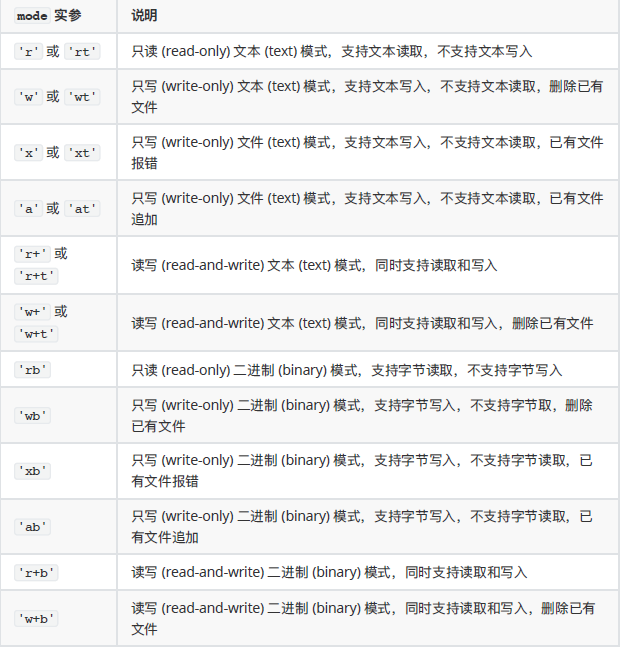

简单来说， 'r' 代表 “只读”， 'w' 代表 “删除只写”， 'x' 代表 “创建只写”， 'a' 代表 “追加只
写”

'r+' 代表 “可读可写”， 'w+' 代表 “删除读写”， 't' 代表 “⽂本” (默认值，可省略)， 'b' 代表
"⼆进制”。

#### 小结

r是读取，r+添加了写入功能，r状态下才可以read；w会直接覆盖旧文件，x是w的保险形式，防止无意识的覆盖；w+在覆盖后有新的写入就可以继续读取(seek属性)；a是append追加操作；加上b代表交互二进制数据，图片等内容都可以用b，byte形式才是计算机存储的基本形式，rwa都是为了便于人类观察的

In [ ]:
%echo 'This is my text3.'> file3.txt 
# 创建⽂件，内容为⽂本 This is mytext.
f = open('file3.txt', 'r+')
text = f.read()
text
f.close()


In [ ]:
with open('file1.csv','r+') as f:
    text  = f.read()
    print(text)

- ⽂件对象 (file object) 是在 内存 ⽽并不是在 磁盘。调⽤ write ⽅法只是改变⽂件对象 (file
object) 所持有的 缓存 (buffer)，并不必然 写⼊到磁盘。只有在缓存 (buffer) 满后，⽂件对象 (file
object) 才会 ⾃动 向操作系统申请写⼊磁盘，并清空缓存 (buffer)。

- ⼿动 将缓存 (buffer) 写⼊磁盘并清空，可以调⽤⽂件对象 (file object) 的 flush ⽅法 ( close ⽅
法在关闭⽂件对象之前，其实会⾃动调⽤ flush ⽅法)。

#### 18.3 读写位置
构成磁盘⽂件的实际上是⼆进制 (binary) 字节串 (byte stream)。⽂件对象 (file object) 在进⾏读写操作
(read/write) 时会保持着读写到的 位置 (position)，即读取 (read) 或写⼊ (write) 到了第⼏个 字节
(byte)。位置 (position) 总是从 0 开始，每读取 (read) 或写⼊ (write) ⼀个字符 (character)，位置
(position) 就会根据所读写的字节 (bytes) 数增加若⼲，具体增加⼏取决于所使⽤的字符编码
(encoding)。⽤⽂件对象 (file object) 的 tell ⽅法可以获取当前位置 (position)，⽤ seek ⽅法可以
移动位置 (position) ⾄指定的字节数。

In [ ]:
f = open('file4.txt', mode='w+',encoding = 'utf-8') # 创建⽂件对象，只写模式
f.write('你好这是我的abcdefg')
#help(f.tell)
f.tell() # 查看⽂件的当前位置，注意与 write ⽅法返回的字符数并不同，tell ⽅法返回的是字节数
f.seek(0) #此时指针在最后，不seek的话无法读取出内容，读取是从指针位置开始的
text = f.read()
text
f.flush() # 将缓存写⼊磁盘

%pycat file4.txt

seek调回指针后再写入会覆盖原位置的

In [ ]:
f.seek(0) # 移动当前位置⾄⽂件的最起始
f.write('Bye') # 再次写⼊，但注意这次是移动过位置之后的写⼊
f.close() # 写⼊磁盘，关闭⽂件，释放资源
%pycat file4.txt

In [ ]:
len('你'.encode('utf-8') ) == (len('Bye'.encode('utf-8')) )## '你' 编码后占三个字节 B y e 三个字符编码后各占⼀个字节

In [ ]:
f = open('file4.txt',encoding = 'utf-8') # 创建⽂件对象，只读模式
f.read(4) # 读取 4 个字符，⽽不是字节
#help(f.read) # 查看 f 对象的 read ⽅法的⽂档

f.tell() #=6,3*1+1*3
# 查看⽂件的当前位置，注意与 read ⽅法传⼊的字符数并不同，tell ⽅法返回的是字节数
%pycat file4.txt
print('------------')
f.read() # 读取剩余全部字符⾄⽂件末尾
f.tell()
f.read() # 注意再次 read 再读不出任何字符，因为当前位置是⽂件末尾
f.seek(0) # 移动当前位置⾄⽂件的最起始
f.read(3) # 注意此次 read 出的是 Bye，因为当前位置是⽂件起始
f.close()

### 18.4 字符编码
字符编码 (character encoding) ⽤来将⽂本 (str) 编码 (encode) 成字节串 (bytes)，或者将字节串
(bytes) 解码 (decode) 成⽂本 (str)。由于磁盘⽂件 (disk file) 以字节串 (bytes) 形式存储信息，⽂本
(text) 模式 (mode) 的⽂件对象 (file object) 在创建时就需要通过形参 (parameter) encoding 指定字符
编码 (character encoding)。Python 默认的 (default) 字符编码 (character encoding) 是 utf-8

In [ ]:
# 以⽂本模式写⼊，以⼆进制模式读取
f = open('file5.txt', mode='w+', encoding='utf-8') # 只写⽂本模式
f.write('指定编码之后，⼆进制对⽤户就是透明的')
text= f.read()
f.seek(0)
text= f.read()
text
f.close()
#quit()
%pycat file5.txt

In [ ]:
f = open('file5.txt', mode='rb') # 只读⼆进制模式
content = f.read()
f.close()
type(content) # 可以看到 content 是 bytes 类型
content
content.decode('utf-8') # 解码成功
#content.decode('gbk') # 解码失败报错，使⽤了不匹配的 encoding


In [ ]:
f = open('file6.txt','w+',errors='ignore') # 只读⽂本模式，忽略解码错误
f.write('Hellp')
f.seek(0)
text = f.read()
text
f.read() # 不再报告 UnicodeDecodeError 错误，但读取出来乱码
f.close()

#### 18.5 换⾏符

Unix 操作系统 (如 FreeBSD、Mac OS X、Linux 等等) 约定以 '\n' ⼀个字符作为⽂本换⾏
(newline)，Windows 操作系统约定以 '\r\n' 两个字符作为⽂本换⾏ (newline)，Mac OS X 以前的旧
Mac 操作系统约定以 '\r' ⼀个字符作为⽂本换⾏ (newline)。这种不⼀致给跨平台软件带来⼀些问
题，⽐如在 Unix 操作系统下创建的⽂本⽂件若在 Windows 操作系统下打开会失去所有的换⾏。


Python 应对这⼀跨平台问题采取了 通⽤换⾏符 (universal newline) 的概念。默认情况下，在读取
(read) ⽂本时， '\n' 、'\r' 、'\r\n' 都会被⾃动转换为 \n ，在写⼊ (write) ⽂本时， \n 字符会
被转换为当前操作系统默认的换⾏符。


如果希望 关闭 通⽤换⾏符 (universal newline) 功能，即在读取 (read) 或写⼊ (write) ⽂本时不希望换
⾏符被⾃动转换，则应在调⽤ open 函数时给形参 (parameter) newline 传递空字符串 '' 作为实参
(argument)。

\r\n（win） 、\r(mac)都会被转化为\n

In [47]:
f = open('file7.txt', mode='w', newline='') # 只写模式，关闭通⽤换⾏符功能
f.write('a\r\nb\rc\nd')
f.close()
print('-------------')
f = open('file7.txt', 'r') # 只读模式，默认开启通⽤换⾏符功能
f.read() # 注意换⾏符在读取时被⾃动转换
f.close()
f = open('file7.txt', 'r', newline='') # 只读模式，关闭通⽤换⾏符功能
print('------newline=\'\'-------')
f.readline() 
f.readline()
f.readline() # 注意换⾏符现在不被⾃动转换
f.close()
f = open('file7.txt', 'r+', newline='\r') # 只读模式，关闭通⽤换⾏符功能
f.seek(0)
print("""-----newline=\'\\r\'-------""")
f.readline() 
f.readline()
f.readline()
f.close()

8

-------------


'a\nb\nc\nd'

------newline=''-------


'a\r\n'

'b\r'

'c\n'

0

-----newline='\r'-------


'a\r'

'\nb\r'

'c\nd'

In [48]:
f = open('file7.txt', mode='r', newline='\r') # 只读模式，以 \r 为换⾏符
f.readline() # 注意以哪个字符换⾏
f.readline() # 再次注意以哪个字符换⾏
f.seek(0) # 回到⽂件起始重新准备读取
f.read() # 注意读取全部⽂本时，任何换⾏符都没有被转换
f.close()
f = open('file8.txt', mode='w', newline='\r') # 只写模式，以 \r 为换⾏符
f.write('a\r\nb\rc\nd')
f.close()
f = open('file8.txt', newline='') # 只读模式，关闭通⽤换⾏符功能
f.read() # 注意现在读取出的是刚才实际写⼊的⽂本
f.close()

'a\r'

'\nb\r'

0

'a\r\nb\rc\nd'

8

'a\r\rb\rc\rd'

### 19.路径操作
与⽂件 (file) 紧密相关的概念是⽂件 (file) 处在⽂件系统 (file system) 中的 路径 (path)。这⾥只简要介绍
⼀些常⽤的路径 (path) 操作 (operating) 函数 (function)。

In [49]:
import os

In [50]:
os.getcwd() # 获取当前⼯作⽬录
os.listdir('/') # 获取指定路径下的⽬录名和⽂件名
os.listdir('/Users')
os.chdir('/Users') # 改变当前⼯作⽬录
os.getcwd()

'C:\\Users\\MY\\python题库整理'

['$Recycle.Bin',
 'ado',
 'aow_drv.log',
 'AppData',
 'Config',
 'Documents and Settings',
 'Fraps',
 'hiberfil.sys',
 'IDMSetup2.log',
 'Intel',
 'jupyter',
 'kingsoft',
 'KSWJJ',
 'MPlugin.dll',
 'NVIDIA',
 'pagefile.sys',
 'PerfLogs',
 'Program Files',
 'Program Files (x86)',
 'ProgramData',
 'Recovery',
 'SPlugin.dll',
 'steam pubg',
 'swapfile.sys',
 'System Volume Information',
 'taidbox',
 'Temp',
 'Users',
 'Windows',
 '题库']

['All Users', 'Default', 'Default User', 'desktop.ini', 'MY', 'Public']

'C:\\Users'

In [51]:
p = os.__file__
p # os库路径字符串
os.path.exists(p) # 计算路径 p 定位的⽂件是否存在


'D:\\Anaconda3.7\\lib\\os.py'

True

In [52]:
os.path.exists('/do/not/exist') # 这是个不存在的⽂件路径
os.path.dirname(p) # 计算路径 p 的 ⽬录名 部分
os.path.basename(p) # 计算路径 p 的 ⽂件名 部分


False

'D:\\Anaconda3.7\\lib'

'os.py'

在linux下面，一般如果你自己使用系统的时候，是可以用`~`来代表`＂/home/你的名字/＂`这个路径的．但是python是不认识`~`这个符号的，如果你写路径的时候直接写`＂~/balabala＂`，程序是跑不动的．所以如果你要用`~`，你就应该用这个os.path.expanduser把~展开

windows系统path为"C:\Users\MY"

In [53]:
os.getcwd()
os.path.expanduser('~') # 把 ~ 符号根据环境变量展开成⽤户⽬录
os.getcwd()
#os.listdir(r'C:\\Users\\MY')
os.chdir(os.path.expanduser(r'~\量化学习'))
os.getcwd()

'C:\\Users'

'C:\\Users\\MY'

'C:\\Users'

'C:\\Users\\MY\\量化学习'

In [54]:
p
os.path.getsize(p) # 获取⽂件⼤⼩ (字节数)


'D:\\Anaconda3.7\\lib\\os.py'

37756

In [55]:
os.path.isabs(p) # 测试路径 p 是否为绝对路径
os.path.isdir(p) # 测试路径 p 是否为⽬录
os.path.isfile(p) # 测试路径 p 是否为⽂件
#os.path.isdir('/users/MY')
os.path.isdir('/users/MY')
os.path.isdir('/do/not/exist')


True

False

True

True

False

In [56]:
os.path.join('/usr', 'local', 'bin/', 'python3.7.2/') # 连接路径
os.path.join('/usr', 'local', '/bin/', 'python3.7.2/') # 注意起始的 /表示根⽬录


'/usr\\local\\bin/python3.7.2/'

'/bin/python3.7.2/'

In [57]:
p
os.path.split(p) # 在最后⼀个 / 处拆分路径
os.path.split(r'/usr/local\\bin')
os.path.split(r'/usr/local/bin')
os.path.split('/usr/local/bin/')
print('--------上面是拆目录，下面是拆路径名（文件名。拓展名）-----------')
os.path.splitext(p) # 将路径 p 拆分为 ⽂件名 和 扩展名
os.path.splitext('os.py') # ⽂件名最后⼀个 . 后⾯的字符为其 扩展名
os.path.splitext('os.py.tar.gz')


'D:\\Anaconda3.7\\lib\\os.py'

('D:\\Anaconda3.7\\lib', 'os.py')

('/usr/local', 'bin')

('/usr/local', 'bin')

('/usr/local/bin', '')

--------上面是拆目录，下面是拆路径名（文件名。拓展名）-----------


('D:\\Anaconda3.7\\lib\\os', '.py')

('os', '.py')

('os.py.tar', '.gz')

In [58]:
os.path.splitext('.bash_profile') # 以 . 开头的⽂件名或⽬录名在 Unix 下代表隐藏⽂件
os.path.abspath('.bash_profile') # 基于当前⼯作⽬录计算 相对路径 的 绝对路径
os.path.abspath('.') # ⼀个点 . 在路径中代表 当前⽬录
os.path.splitext('.')
print('-------------------------------')
os.path.abspath('..') # 两个点 .. 在路径中代表 上级⽬录
os.path.splitext('..')
os.path.splitext('/usr/local/bin')

#help(os.path) # 浏览⽂档，查看全部路径操作函数
#help(os) # 浏览⽂档，查看全部⽂件系统函数，包括创建⽬录、⽂件重命名、修改权限等

('.bash_profile', '')

'C:\\Users\\MY\\量化学习\\.bash_profile'

'C:\\Users\\MY\\量化学习'

('.', '')

-------------------------------


'C:\\Users\\MY'

('..', '')

('/usr/local/bin', '')

### 20. 路径对象
从 Python 3.4 版本起，Python 增加了⼀个新的标准库 pathlib ，提供了功能强⼤的 路径对象 (path
object)，使得以往基于 os 和 os.path 标准库进⾏的以函数 (function) 调⽤ (call) 为主的操作，可以
转为更直观的⾯向对象操作。下⾯简单举⼏个例⼦，更多的请⾃⾏⽤ help 查看⽂档。

In [59]:
import os
import pathlib
os.chdir(os.path.expanduser('~'))
os.getcwd()
p = pathlib.Path('week06') # 基于 相对路径 创建 路径对象 并使⽤名称 p 指向该对象
p
p.exists() # 判断路径 (⽬录或⽂件) 是否存在


'C:\\Users\\MY'

WindowsPath('week06')

False

In [60]:
#p.rmdir()
#p.mkdir() # 创建⽬录
os.listdir()


['.anaconda',
 '.android',
 '.astropy',
 '.bash_history',
 '.conda',
 '.condarc',
 '.config',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.oracle_jre_usage',
 '.Origin',
 '.PyCharm2017.1',
 '.QtWebEngineProcess',
 '.spss',
 '.spyder-py3',
 '3D Objects',
 'AnacondaProjects',
 'ansel',
 'AppData',
 'Application Data',
 'Consolas.reg',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Draft.ipynb',
 'etc',
 'Favorites',
 'file.del.txt',
 'file.del2.txt',
 'Flash Center',
 'For change',
 'For change crawler',
 'Funshion',
 'inittk.ini',
 'inst.ini',
 'IntelGraphicsProfiles',
 'license.dat',
 'Links',
 'Local Settings',
 'MicrosoftEdgeBackups',
 'Music',
 'My Documents',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{47690995-c332-11e9-b646-d36205888d4c}.TM.blf',
 'NTUSER.DAT{47690995-c332-11e9-b646-d36205888d4c}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{47690995-c332-11e9-b646-d36205888d4c}.TMContaine

In [61]:
sorted(os.listdir('.')) # 检查 week06 ⽬录确实已被创建
p.absolute() # 计算 p 的绝对路径
p # p 被指定的是相对路径


['.Origin',
 '.PyCharm2017.1',
 '.QtWebEngineProcess',
 '.anaconda',
 '.android',
 '.astropy',
 '.bash_history',
 '.conda',
 '.condarc',
 '.config',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.oracle_jre_usage',
 '.spss',
 '.spyder-py3',
 '3D Objects',
 'AnacondaProjects',
 'AppData',
 'Application Data',
 'Consolas.reg',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'Draft.ipynb',
 'Favorites',
 'Flash Center',
 'For change',
 'For change crawler',
 'Funshion',
 'IntelGraphicsProfiles',
 'Links',
 'Local Settings',
 'MicrosoftEdgeBackups',
 'Music',
 'My Documents',
 'NTUSER.DAT',
 'NTUSER.DAT{47690995-c332-11e9-b646-d36205888d4c}.TM.blf',
 'NTUSER.DAT{47690995-c332-11e9-b646-d36205888d4c}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{47690995-c332-11e9-b646-d36205888d4c}.TMContainer00000000000000000002.regtrans-ms',
 'NetHood',
 'OneDrive',
 'Pictures',
 'PrintHood',
 'QuantEcon.py',
 'Recent',
 'Roaming',
 'Saved Games',
 'Sea

WindowsPath('C:/Users/MY/week06')

WindowsPath('week06')

In [62]:
p
p.mkdir()
fp = p / 'file1.txt' # ⽤ / 运算符可以⽅便地连接路径，⽣成新的路径对象
fp # 查看 f 路径对象及其相对路径
f = fp.open(mode='w', encoding='gbk', newline='\r\n') # 创建⼀个只写模式的⽂件对象
f.write('你好\n欢迎\n') # 写⼊字符串
f.close() # 关闭⽂件，写⼊磁盘，释放资源


WindowsPath('week06')

WindowsPath('week06/file1.txt')

6

In [63]:
os.getcwd()
fp.read_text(encoding='gbk') # 调⽤ read_text ⽅法直接以通⽤换⾏符模式读取⽂本，省去打开关闭步骤
fp.rename('file.del2.txt') # 调⽤ rename ⽅法直接将⽂件重命名
fp # 注意 fp 的相对路径并没有跟随改变
fp.exists() # fp 对象指向的⽂件已不存在
list(p.iterdir()) # p 所指的 week06 ⽬录下并不存在 file.del.txt ⽂件


'C:\\Users\\MY'

'你好\n欢迎\n'

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'week06\\file1.txt' -> 'file.del2.txt'

In [ ]:
import os
os.getcwd()
os.listdir() # 注意在当前⼯作⽬录下找到了 file.del.txt ⽂件，这是因为传给rename ⽅法的 相对路径

## 21.⾃测题
### <font color = red>21.1 简答题
请简述 open 函数具有哪些形参 (parameter)，各个形参 (parameter) 什么含义，分别代表什么功能。

[open 函数各个形参 (parameter) 什么含义](https://jingyan.baidu.com/article/fec7a1e55304975190b4e799.html)

In [64]:
import inspect
inspect.signature(open)

<Signature (file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)>

有
1. file
2. mode        #='r'
3. buffering        #=-1
4. encoding        #=None
5. errors        #=None
6. newline        #=None
7. closefd        #=True
8. opener=        #None
这几个形参

- 1.file

调⽤ (call) open 函数 (function) ⾄少 需要给形参 (parameter)` file` 传递⼀个字符串 (str) 实例
(instance) 作为实参 (argument)，⽤来指定需要打开的⽂件 (file) 的路径 (path)：

- 2.mode

调⽤ (call) open 函数 (function) 创建⽂件对象 (file object) 时，可以 给形参 (parameter) mode 传递
⼀个字符串 (str) 实例 (instance) 作为实参 (argument)，⽤来指定打开⽂件 (file) 的 模式 (mode)。r(t/r+/rb/r+b 是r（读写及其拓展形式）；w(t)/w+/wb/w+b,主要是w（写及其拓展形式）;x/xt以理解是是w/wt的保险模式，不会直接删除覆盖读取的file;a(t)/ab是append追加模式和二进制追加模式

其中，以'r'只读模式打开文件的mode可以省略

##### 个人理解

###### 1. 动作：

- 'r'：只读模式（默认）；

- 'w'：写模式；

- 'a'：追加写入模式;

###### 2. 文件模式：

- 'b'：二进制模式;

- 't'：文本模式（默认）;

- '+'：更新磁盘文件（读取并写入）

模式=动作+文件模式

- 3.buffering: 设置缓冲（不影响结果）

- 4 .encoding: 解码或编码文件的编码的名称，仅适用于文本文件

字符编码 (character encoding) ⽤来将⽂本 (str) 编码 (encode) 成字节串 (bytes)，或者将字节串
(bytes) 解码 (decode) 成⽂本 (str)。由于磁盘⽂件 (disk file) 以字节串 (bytes) 形式存储信息，⽂本
(text) 模式 (mode) 的⽂件对象 (file object) 在创建时就需要通过形参 (parameter) encoding 指定字符
编码 (character encoding),来将保存在磁盘文件里面的信息转化为我们想看到的形式的信息。

Python 默认的 (default) 字符编码 (character encoding) 是 utf-8 。

- 5.errors: 指明编码和解码错误时怎么样处理，适用于文本模式

如果在读取 (read) 或写⼊ (write) 时希望忽略可能出现的编码 (encode) 解码 (decode) 错误，可以给
open 函数的 errors 形参 (parameter) 传递字符串 'ignore' 作为实参 (argument)。

f = open('file6.txt', errors='ignore')

1）errors=strict，编码出错则抛出异常ValueError。同等于默认errors=None;

2）errors=ignore，忽略错误。

3）errors=replace，替代模式，比如使用“？’来替换出错的地方。

- 6.newline

newline: 文本模式之下，设置一行的结束字符

Python对Unix 的换行符 `'\n'` 、Windows 的换行符` '\r\n'` 和Mac OS X 以前的旧Mac 操作系统的 换行符`'\r'` 采取了 通⽤换⾏符 (universal newline) 的替代。默认情况下，在读取(read) ⽂本时，` '\n' 、'\r' 、'\r\n' `都会被⾃动转换为` \n `，在写⼊ (write) ⽂本时， `\n` 字符会被转换为当前操作系统默认的换⾏符。

关闭 通⽤换⾏符 (universal newline) 功能，即在读取 (read) 或写⼊ (write) ⽂本时不希望换
⾏符被⾃动转换，则应在调⽤ open 函数时给newline 传递空字符串 '' 作为实参
(argument)。

- 7.closefd: 传入的file参数类型。

参数closefd：关闭文件描述符，True表示关闭。默认True，必须时True，否则报错。

- 8.opener: 自定义打开文件方式(使用默认None)

### <font color = red>21.2 简答题
请简述 open 函数⽀持哪些模式 (mode)，并讨论他们之间的区别。

简单来说， 'r' 代表 “只读”， 'w' 代表 “删除只写”， 'x' 代表 “创建只写”， 'a' 代表 “追加只
写”， 'r+' 代表 “可读可写”， 'w+' 代表 “删除读写”， 't' 代表 “⽂本” (默认值，可省略)， 'b' 代表
"⼆进制

#### 个人总结

r只能读取open的file，w可以创造和覆盖写入file，但是不可以读取文件（无法read）；

r+可以同时读取 (read) 和写⼊ (write) 的情形，即r+模式下可以file.write()而r不可以，但是一般很少见，因为一般修改已有文件是分成读取文字、修改文字和写入文字三步骤，不需要同时读写。
r/r+都无法创建文件，所以必须要先有file存在才能操作

w模式可以创建文件，并且可以写入write内容，但是会覆盖文件
w+是w的拓展，可以write内容的同时写入文件，同样一般很少用

x/x+是w/w+的保险模式，不会覆盖已存在文件

a模式也无法读取文本，但是可以创建文本，写入上只能追加;a+可以读取文本，但是a/a+都只能从文本末尾开始写入内容，其他的模式都是从文本初始位置开始作用，a/a+是从文本末尾开始作用（添加）

经过测试，r+相对于w+少了至少有“创建新文件”这个功能，其他功能应该相似；而a+和r+/w+至少在作用位置上有本质区别

r+b/w+b是r+/b+读写二进制内容时候的模式，xb是x的读取二进制内容的模式

### 21.3 简答题
请写代码，打开并读取 os 模块的源代码，并将其显示在终端上。

In [65]:
print(os.__file__) # 在终端输出 os 模块的 .py 源码⽂件路径
f = open(os.__file__) # 创建⽂件对象，以只读⽂本模式打开 os 模块的源代码
text = f.read() # 读取⽂本
print(text) # 在终端输出 os 模块的源代码

D:\Anaconda3.7\lib\os.py
r"""OS routines for NT or Posix depending on what system we're on.

This exports:
  - all functions from posix or nt, e.g. unlink, stat, etc.
  - os.path is either posixpath or ntpath
  - os.name is either 'posix' or 'nt'
  - os.curdir is a string representing the current directory (always '.')
  - os.pardir is a string representing the parent directory (always '..')
  - os.sep is the (or a most common) pathname separator ('/' or '\\')
  - os.extsep is the extension separator (always '.')
  - os.altsep is the alternate pathname separator (None or '/')
  - os.pathsep is the component separator used in $PATH etc
  - os.linesep is the line separator in text files ('\r' or '\n' or '\r\n')
  - os.defpath is the default search path for executables
  - os.devnull is the file path of the null device ('/dev/null', etc.)

Programs that import and use 'os' stand a better chance of being
portable between different platforms.  Of course, they must then
only use functions th

### <font color = red>21.4 简答题
如何理解⽂件对象 (file object) 和磁盘⽂件 (disk file) 之间的关系？我们为什么要⼿动关闭⽂件对象？

#### 如何理解⽂件对象 (file object) 和磁盘⽂件 (disk file) 之间的关系

⽂件 (file) 位于 磁盘 (disk)，Python 需要根据⽂件 (file) 处于⽂件系统 (file system) 的路径 (path)，在
内存 中创建出⼀个指向该路径 (path) 的对象 (object)，借此对象 (object) 的 read 和 write ⽅法
(method) 来完成对磁盘⽂件的读写 (I/O) 操作 (operation)。这样的对象叫做 ⽂件对象 (file object)，通
常通过内置函数 (built-in function) open 来创建

#### 个人理解：

python提供的是环境，归根结底只是进程，数据通常需要保存在计算机或者服务器内，在使用时可以从磁盘或者服务器调用到环境内处理，最终输出保存以完成I/O过程，就像一个人（文件数据）可以出门买东西（python环境下操作），但是最后还是要回家（磁盘）一样

#### 为什么要手动关闭文件对象？

磁盘⽂件是⼀种资源，Python 进程需要向操作系统申请 ( open ) 并成功才能获得，使⽤完毕之后需要
⼿动 释放 ( close )。Python 解释器 (interpreter) 虽然有 垃圾回收 (garbage collection, GC) 功能，但
回收的仅限于内存对象 (object)，并不包括像⽂件 (file) 这样的外部资源。Python 解释器 (interpreter)
进程 (process) 虽然在退出时会释放所有已申请但尚未释放的资源，但还是建议 Python 程序员⾃⼰，
在使⽤完毕后及时释放资源，以免资源被过久占⽤，从⽽影响其他进程 (process) 运⾏。

#### 个人理解

Python想要实现对文件的操作进程需要提前像系统申请空间资源，这种外部的空间资源不属于内存对象，所以不会被python自动回收，所以为了节约资源（也为了方便完成后的调用）需要及时的、主动的释放这些资源，否则由于系统的资源是有限的，会影响其他进程的运行

就像一个学校内，学生想要组织活动的话需要先向学校申请教室，这种教室是外部资源，获得允许后学校并不会主动回收，因为不属于学校日常“检查并回收”的对象，所以需要学生主动的还给学校，避免影响其他校园活动

### <font color = red>21.5 简答题
请写代码，以写⼊ (write) 为例，演示⽂件缓存 (buffer) 的概念，即演示 “写⼊⽂件” 与 “写⼊磁盘” 的区
别。

In [66]:
os.chdir(r'C:\Users\MY\python题库整理')

In [67]:
f = open('file21.5_1.txt', mode='w') # 创建⽂件对象
f.write("It's a test for 21.5")



20

In [68]:
%pycat file21.5_1.txt

此时并没有写入，或者换用另一个终端，也会是一样的结果

In [69]:
f.close()

#### 个人总结
此时的文件对象的改变还在内存中未写入到磁盘，只有内存不够的情况下才会文件对象的改写才会主动像系统申请写入磁盘并清理缓存中的数据和操作，否则只能手动申请，采用flush方法（close方法其实也是通过默认调用flush保存对象的）

In [70]:
f = open('file21.5_test2.txt', mode='w') # 创建⽂件对象
f.write("It's a test for 21.5")
f.flush


20

<function TextIOWrapper.flush()>

In [71]:
%pycat file21.5_test2.txt
f.close()

此时有显示“It's a test for 21.5”

#### 个人理解

只有申请写入磁盘才真正的读取到文件，否则写入的内容会保留在缓存中。

打个比方：我（文本文档）想出门买东西（写入数据），我一旦出门了（申请了内存空间）就只能等到装不下了（系统内存满负荷）必须回来的时候（被动）再回来（申请写入磁盘），才算我真正的买回来了东西（写入数据保存到了磁盘），如果我只买了少量的东西就想回家，我就只能主动申请（flush方法）回家才能回来把东西放下

### <font color = red>21.6 简答题
请写代码，以读取 (read) 为例，演示⽂件位置 (position) 的概念，包括获取当前位置、移动当前位置等
操作

In [72]:
f = open('file21.6.txt', mode='w',encoding = 'utf-8') # 创建⽂件对象，只写模式
f.write('这是第21.6题的test')
f.close()


13

选用mode = 'a' 是为了使作用为止来到写入内容的结束处

In [73]:
with open('file21.6.txt', mode='a+',encoding = 'utf-8') as f:
    f.tell() #tell ⽅法返回的是字节数
    f.seek(10)#不通过seek方法将位置移动到写入内容开始处的话f.read()内容为空
    f.tell()
    f.read()
    f.flush() # 将缓存写⼊磁盘
    # 切换到另⼀个终端
%pycat file21.6.txt

23

10

10

'1.6题的test'

### <font color = red>21.7 简答题
请写代码，以编码 (encoding) 的概念为基础，演示读/写⽂本 (text) ⽂件与读/写⼆进制 (binary) 的 等价
操作。

#### 小结

- 以字符串（文本）写入后可以用二进制（rb/wb/ab）的模式先读取，再解码出来,就可以得到想要的字符串；同样的，可以现以编码成二进制的字节串写入文本(wb+)，然后以r+的形式读取出来（需要注意解码方式），也可以得到想要的字符串

 1.  以⽂本模式写⼊，以⼆进制模式读取

 2.  以⼆进制模式写⼊，以⽂本模式读取 

#### 以⽂本模式写⼊，以⼆进制模式读取

In [74]:

f = open('file21.7.txt', mode='w', encoding='gbk') # 只写⽂本模式
s = 'This is a test for 21.7'
f.write(s)
f.close()


23

In [75]:
%pycat file21.7.txt

In [76]:
f = open('file21.7.txt', mode='rb') # 只读⼆进制模式
content = f.read()
f.close()
type(content) # 可以看到 content 是 bytes 类型
content
content.decode('gbk') == s

bytes

b'This is a test for 21.7'

True

#### 以⼆进制模式写⼊，以⽂本模式读取

In [77]:
text = 'This is a test for 21.7.2'
content = text.encode('utf-8')
f = open('file21.7.2.txt', mode='w+b') # 只写⼆进制模式
f.write(content)
f.close()
%pycat file21.7.txt

25

In [78]:
f = open('file21.7.2.txt', mode='r+') 
text2 = f.read()
text2 == text
f.close()

True

### <font color = red>21.8 简答题
请写代码，演示通⽤换⾏符 (universal newline) 的概念，包括打开和关闭该功能，以及读写之间的差
异。先演示写⼊，再演示读取。

#### 换行符功能是python默认的，想要关闭只需要将open的newline参数改写为newline = ""即可

In [79]:
f = open('file21.8.txt', mode='w', newline='') # 只写模式，关闭通⽤换⾏符功能
f.write('a\r\nb\rc\nd')
f.close()
%pycat file21.8.txt

8

在file21.8.txt之下，所有的\r\n,\r,\n都被成功转义为\n进行了转行


#### 只读r模式下

打开换行符功能时以\n换行，关闭换行符功能时以\r、\r\n、\n都能换行

In [80]:
f = open('file21.8.txt', mode='r') # 只读模式，默认开启通⽤换⾏符功能
f.read() # 换⾏符在读取时被⾃动转换
f.close()
f = open('file21.8.txt', mode='r', newline='') # 只读模式，关闭通⽤换⾏符功能
for i in range(4):
    f.readline() # 注意以哪个字符换⾏
f.seek(0)
f.read() # 换⾏符现在不被⾃动转换
f.close()

'a\nb\nc\nd'

'a\r\n'

'b\r'

'c\n'

'd'

0

'a\r\nb\rc\nd'

#### 只写w模式下

In [81]:
f = open('file21.8.2.txt', mode='w', newline='\r\n') # 只写模式，以 \r 为换⾏符
f.write('a\r\nb\rc\nd')
f.close()
f = open('file21.8.2.txt', newline='') # 遇到三种换行符都换行
for i in range(4):
    f.readline() # 注意以哪个字符换⾏
f.seek(0)
f.read() # 注意现在读取出的是刚才实际写⼊的⽂本
f.close()

8

'a\r'

'\r\n'

'b\r'

'c\r\n'

0

'a\r\r\nb\rc\r\nd'

实际写入的文本是将字符串中的所有得\n换行符转换成所给的newline的换行符参数

### <font color = red>21.9 简答题
请写 Python 代码，获取当前⼯作⽬录，再把当前⼯作⽬录切换⾄⽂件系统根⽬录，再把当前⽬录切换
⾄⽤户根⽬录

In [82]:
import os
os.chdir(r'C:\Users\MY\pystudy')#为了演示效果，线设定一个当前目录
os.getcwd()
os.chdir(r"C:/")
os.getcwd()
os.chdir(r'C:/Users')
os.getcwd()

'C:\\Users\\MY\\pystudy'

'C:\\'

'C:\\Users'

### 21.10 简答题
请写 Python 代码，展示 /etc ⽬录下的内容 (⽬录和⽂件)，并判断该⽬录下的 profile 名称是⽬录
还是⽂件。

In [83]:
import os 
os.chdir(r'C:\Users\MY\etc')#目录是自己创建的
os.getcwd()
os.listdir(r'C:\Users\MY\etc')
#type(os.listdir(r'C:\Users\MY\etc'))
os.path.isdir(r"C:\Users\MY\etc\profile")
os.path.isfile(r"C:\Users\MY\etc\profile")

'C:\\Users\\MY\\etc'

['profile']

True

False

### <font color = red> 21.11 简答题(字符串helloworld不可改，route变量名可以改)
请写 Python 代码，在当前⽬录下新建⼀个 week15 ⽬录，在 week015 ⽬录下新建⼀个名为
temp.py 的⽂本⽂件，向其中写⼊⽂本 print('Hello World!') ，然后将其删除。

In [84]:
import pathlib
import os
os.chdir(r'C:\Users\MY\python题库整理')
route = pathlib.Path('week15')#也可以给定绝对路径,目前还只是对象，没有实际的文件目录
route.mkdir()
#route.absolute()
route
print('----------------------')
file_route = route / "temp.py"
file_route
print('----------------------')
file = file_route.open(mode='w',encoding='GBK',newline = '\r\n')
file.write('print(\'Hello World!\')')
file.close()
print('----------------------')
#route.rmdir()
file_route.rename('delete3.txt')
file_route.exists()

WindowsPath('week15')

----------------------


WindowsPath('week15/temp.py')

----------------------


21

----------------------


False

### 21.12 简答题
请写 Python 代码，计算` datetime `模块的源代码的⽬录名、⽂件名和扩展名，并在此基础上获取其所
在⽬录下的其他⽬录名和⽂件名。

In [85]:
import os
import datetime
os.getcwd()
path = datetime.__file__
#path
os.path.dirname(path)# 计算路径 p 的 ⽬录名 部分
os.path.basename(path) # 计算路径 p 的 ⽂件名 部分
os.path.splitext(os.path.basename(path))[1]#扩展名部分

'C:\\Users\\MY\\python题库整理'

'D:\\Anaconda3.7\\lib'

'datetime.py'

'.py'

### 21.13 简答题
请写 Python 代码，使⽤路径对象 (path object)，⽤⼀条语句创建出⽬录
./week06/lecture01/trash ，并在其下创建 greeting.exe ⽂件，在其内部写⼊字符串 '⽆效命
令' ⽤ 'utf-16' 编码得出的⼆进制字节串。

In [86]:
str('⽆效命令'.encode('utf-16'))
import os
os.getcwd()

"b'\\xff\\xfeF/He}T\\xe4N'"

'C:\\Users\\MY\\python题库整理'

只能做到一条语句创建./week06/lecture01/trash，然后创建greeting.exe文件，打开并写入(用txt文件格式检查过)

In [89]:
import os
import pathlib
os.makedirs(pathlib.Path('./week6/lecture01/trash'))
#p = pathlib.Path(r'C:\Users\MY\python题库整理\week06\lecture01\trash')
file = pathlib.Path('./week6/lecture01/trash') / 'greeting.txt'
f = file.open(mode='w', encoding='utf-8', newline='\r\n')
f.write(str('⽆效命令'.encode('utf-16')))
f.close()

22